# Исследование надежности заемщиков


## 1 Изучение данных

In [41]:
import pandas as pd
import seaborn as sns

In [42]:
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

In [43]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [45]:
data.groupby(data['days_employed'].isnull()).count()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
days_employed,,,,,,,,,,,,
False,19351,19351,19351,19351,19351,19351,19351,19351,19351,19351,19351,19351
True,2174,0,2174,2174,2174,2174,2174,2174,2174,2174,0,2174


## 2 Предобработка данных

### 2.1 Удаление пропусков

In [46]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В двух столбцах есть пропущенные значения. Один из них — days_employed. Другой столбец с пропущенными значениями — total_income — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца income_type. Например, у человека с типом занятости сотрудник пропуск в столбце total_income должен быть заполнен медианным доходом среди всех записей с тем же типом.

In [47]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### 2.2  Обработка аномальных значений

Замена отрицательных значений в столбце days_employed

In [48]:
data['days_employed'] = data['days_employed'].abs()

Для каждого типа занятости выведем медианное значение трудового стажа days_employed в днях.

In [49]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть. Тем более этот столбец не понадобится для исследования.

Перечень уникальных значений столбца children.

In [50]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

В Столбце children есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма data

In [51]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

In [52]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### 2.3  Удаление пропусков (продолжение)

 Пропуски в столбце days_employed заполним медианными значениями по каждого типа занятости income_type

In [53]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

Убедимся, что все пропуски заполнены.

In [54]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### 2.4  Изменение типов данных

Заменим вещественный тип данных в столбце total_income на целочисленный 

In [55]:
data['total_income'] = data['total_income'].astype(int)

In [56]:
data['total_income'].info()

<class 'pandas.core.series.Series'>
Int64Index: 21402 entries, 0 to 21524
Series name: total_income
Non-Null Count  Dtype
--------------  -----
21402 non-null  int32
dtypes: int32(1)
memory usage: 250.8 KB


### 2.5  Обработка дубликатов

Обработка неявные дубликаты в столбце education

In [57]:
data['education'] = data['education'].str.lower()
data.duplicated().sum()

71

In [58]:
data = data.drop_duplicates()

In [59]:
data.duplicated().sum()

0

### 2.6  Категоризация данных

Cоздадим в датафрейме data столбец total_income_category с категориями:

0–30000 — 'E';
30001–50000 — 'D';
50001–200000 — 'C';
200001–1000000 — 'B';
1000001 и выше — 'A'.

In [60]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass


In [61]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

Создим функцию, которая на основании данных из столбца purpose сформирует новый столбец purpose_category, в который войдут следующие категории:

'операции с автомобилем',
'операции с недвижимостью',
'проведение свадьбы',
'получение образования'.

In [62]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [63]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,B,операции с недвижимостью
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,B,операции с недвижимостью
7,0,152.779569,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,C,получение образования
8,2,6929.865299,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,C,проведение свадьбы
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,C,операции с недвижимостью


# 2.7  Исследование данных

**Есть ли зависимость между количеством детей и возвратом кредита в срок?**

In [64]:
# вычисляем количество заемщиков по количеству детей
children_qty_group = data.groupby('children')['family_status_id'].count().reset_index()
children_qty_group

,children,family_status_id
0,0,14091
1,1,4808
2,2,2052
3,3,330
4,4,41
5,5,9


In [65]:
# вычисляем количество просрочек по количеству детей
children_debt_group = data.groupby('children')['debt'].sum().reset_index()
children_debt_group

,children,debt
0,0,1063
1,1,444
2,2,194
3,3,27
4,4,4
5,5,0


In [66]:
# объеденяем таблицы
children_group = pd.merge(children_qty_group, children_debt_group, how='left')
children_group = children_group.rename(columns = {'family_status_id' : 'borrower_qty'})
children_group

,children,borrower_qty,debt
0,0,14091,1063
1,1,4808,444
2,2,2052,194
3,3,330,27
4,4,41,4
5,5,9,0


In [68]:
# вычисляем процент просрочек
children_group['debt_ratio'] = children_group['debt'] / children_group['borrower_qty']
children_group

,children,borrower_qty,debt,debt_ratio
0,0,14091,1063,0.075438
1,1,4808,444,0.092346
2,2,2052,194,0.094542
3,3,330,27,0.081818
4,4,41,4,0.097561
5,5,9,0,0.000000


<AxesSubplot:xlabel='children', ylabel='debt_ratio'>

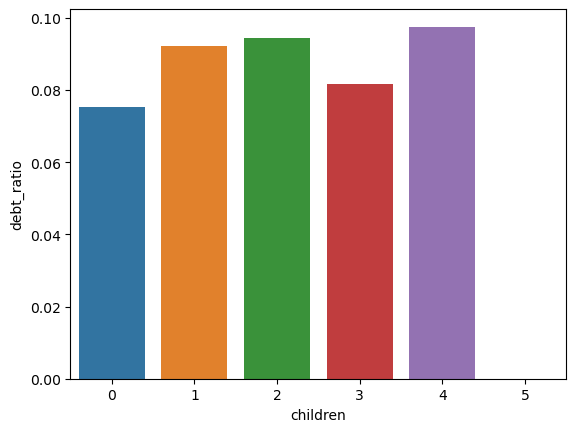

In [69]:
sns.barplot(x = children_group['children'] , y = children_group['debt_ratio'])

children   debt       debt_ratio
            count   sum           
0        0  14091  1063   0.075438
1        1   4808   444   0.092346
2        2   2052   194   0.094542
3        3    330    27   0.081818
4        4     41     4   0.097561
5        5      9     0   0.000000

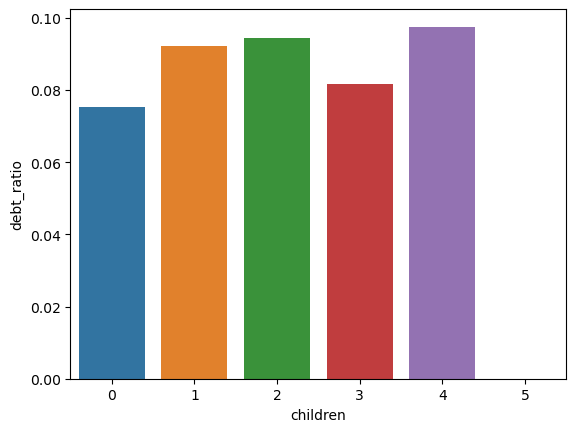

In [70]:
children_group = data.groupby('children').agg({'debt': ['count', 'sum']}).reset_index()
children_group['debt_ratio'] = data.groupby('children')['debt'].mean()
sns.barplot(x = children_group['children'] , y = children_group['debt_ratio'])
children_group

*Вывод: Из графика видно, что есть тренд на увеличение процента просрочек с ростом количества детей. Просрочек не наблюдается у заемщиков с 5ю детьми, но их слишком мало для репрезентативности выборки. *

 **Есть ли зависимость между семейным положением и возвратом кредита в срок?**

In [71]:
# вычисляем количество заемщиков по семейному статусу
family_qty_group = data.groupby(['family_status','family_status_id'])['children'].count().reset_index()
family_qty_group = family_qty_group.rename(columns = {'children' : 'borrower_qty'})
family_qty_group = family_qty_group.sort_values(by = ['family_status_id'])
family_qty_group

,family_status,family_status_id,borrower_qty
4,женат / замужем,0,12261
3,гражданский брак,1,4134
2,вдовец / вдова,2,951
1,в разводе,3,1189
0,Не женат / не замужем,4,2796


In [74]:
# вычисляем количество просрочек по семейному статусу
family_debt_group = data.groupby('family_status')['debt'].sum().reset_index()
family_debt_group

,family_status,debt
0,Не женат / не замужем,273
1,в разводе,84
2,вдовец / вдова,63
3,гражданский брак,385
4,женат / замужем,927


In [75]:
# объеденяем таблицы
family_group = pd.merge(family_qty_group, family_debt_group, how='left')
family_group

,family_status,family_status_id,borrower_qty,debt
0,женат / замужем,0,12261,927
1,гражданский брак,1,4134,385
2,вдовец / вдова,2,951,63
3,в разводе,3,1189,84
4,Не женат / не замужем,4,2796,273


In [76]:
# вычисляем процент просрочек
family_group['debt_ratio'] = family_group['debt'] / family_group['borrower_qty']
family_group

,family_status,family_status_id,borrower_qty,debt,debt_ratio
0,женат / замужем,0,12261,927,0.075606
1,гражданский брак,1,4134,385,0.093130
2,вдовец / вдова,2,951,63,0.066246
3,в разводе,3,1189,84,0.070648
4,Не женат / не замужем,4,2796,273,0.097639


<AxesSubplot:xlabel='debt_ratio', ylabel='family_status'>

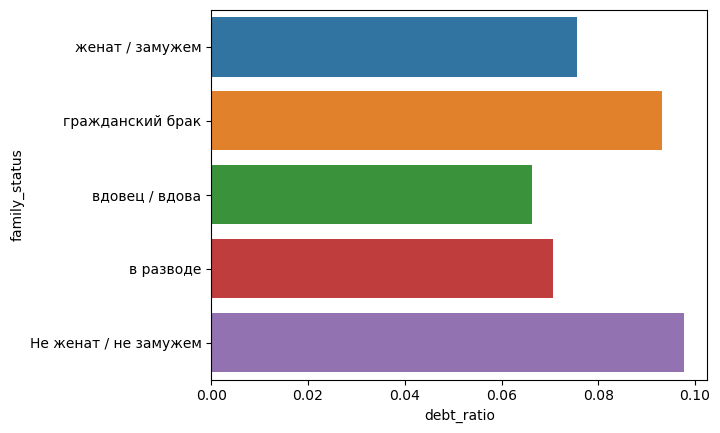

In [77]:
sns.barplot(x = family_group['debt_ratio'] , y = family_group['family_status'])

Вывод: Данные показывают, что заемщики не состоящие в официальном браке имеют больший процент просрочек

**Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

In [79]:
# вычисляем количество заемщиков по уровню дохода
income_qty_group = data.groupby('total_income_category')['children'].count().reset_index()
income_qty_group = income_qty_group.rename(columns = {'children' : 'borrower_qty'})
income_qty_group = income_qty_group.sort_values(by = ['total_income_category'], ascending = False)
income_qty_group

,total_income_category,borrower_qty
4,E,22
3,D,349
2,C,15921
1,B,5014
0,A,25


In [80]:
# вычисляем количество просрочек по уровню дохода
income_debt_group = data.groupby('total_income_category')['debt'].sum().reset_index()
income_debt_group

,total_income_category,debt
0,A,2
1,B,354
2,C,1353
3,D,21
4,E,2


In [81]:
# объеденяем таблицы
income_group = pd.merge(income_qty_group, income_debt_group, how='left')
income_group

,total_income_category,borrower_qty,debt
0,E,22,2
1,D,349,21
2,C,15921,1353
3,B,5014,354
4,A,25,2


In [82]:
# вычисляем процент просрочек
income_group['debt_ratio'] = income_group['debt'] / income_group['borrower_qty']
income_group

,total_income_category,borrower_qty,debt,debt_ratio
0,E,22,2,0.090909
1,D,349,21,0.060172
2,C,15921,1353,0.084982
3,B,5014,354,0.070602
4,A,25,2,0.080000


<AxesSubplot:xlabel='total_income_category', ylabel='debt_ratio'>

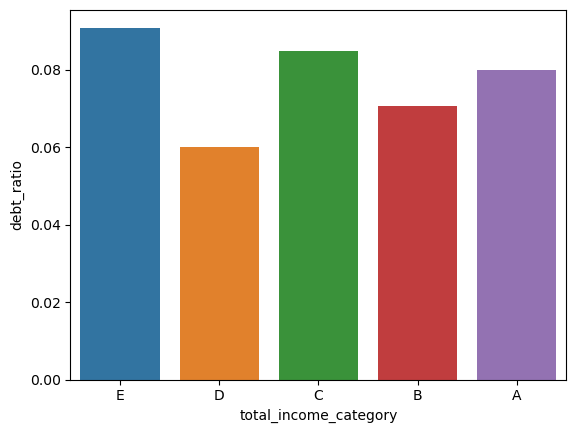

In [83]:
sns.barplot(x = income_group['total_income_category'] , y = income_group['debt_ratio'])

Вывод: Из графиков виден общий тренд на увеличение процента невозвратов в срок с увеличеним доходов заемщика. Наблюдается локальный всплеск процента просрочек у заемщиков с низкими доходами, но их количество слишком мало для репрезентативности выборки

**Как разные цели кредита влияют на его возврат в срок?**

In [85]:
# вычисляем количество заемщиков по цели кредита 
purpose_qty_group = data.groupby('purpose_category')['children'].count().reset_index()
purpose_qty_group = purpose_qty_group.rename(columns = {'children' : 'borrower_qty'})
purpose_qty_group

,purpose_category,borrower_qty
0,операции с автомобилем,4279
1,операции с недвижимостью,10751
2,получение образования,3988
3,проведение свадьбы,2313


In [86]:
# вычисляем количество просрочек по цели кредита 
purpose_debt_group = data.groupby('purpose_category')['debt'].sum().reset_index()
purpose_debt_group

,purpose_category,debt
0,операции с автомобилем,400
1,операции с недвижимостью,780
2,получение образования,369
3,проведение свадьбы,183


In [87]:
# объеденяем таблицы
purpose_group = pd.merge(purpose_qty_group, purpose_debt_group, how='left')
purpose_group

,purpose_category,borrower_qty,debt
0,операции с автомобилем,4279,400
1,операции с недвижимостью,10751,780
2,получение образования,3988,369
3,проведение свадьбы,2313,183


In [88]:
purpose_group['debt_ratio'] = purpose_group['debt'] / purpose_group['borrower_qty']
purpose_group

,purpose_category,borrower_qty,debt,debt_ratio
0,операции с автомобилем,4279,400,0.093480
1,операции с недвижимостью,10751,780,0.072551
2,получение образования,3988,369,0.092528
3,проведение свадьбы,2313,183,0.079118


<AxesSubplot:xlabel='debt_ratio', ylabel='purpose_category'>

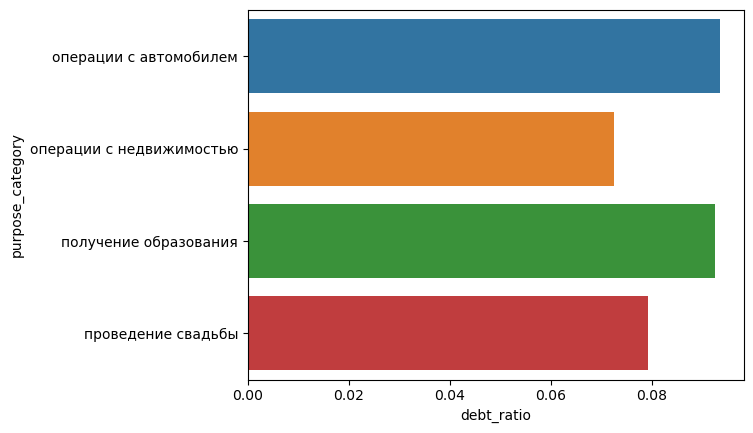

In [89]:
sns.barplot(x = purpose_group['debt_ratio'] , y = purpose_group['purpose_category'])

Вывод: Менее всего процент просрочек наблюдается в категориях 'Операции с недвижимостью' и 'Проведение свадьбы'

**Возможные причины появления пропусков в исходных данных?**

Как отмечалось ранее пропуски в данных наблюдались в столбцах с трудовым стажем и общим доходом. Эти столбцы типа float(число, с плавающей точкой). Возможно в части данных использовался другой разделитель и Pandas не смог корректно прочитать данные поля.

**Почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.**

На средние значения сильно влияют различные "вбросы" (Данные, сильно отличающиеся от остальных). Они перетягивают средние значения вверх или низ. Медиана же не подвержена данному явлению. Поэтому, заполнить пропуски медианным значением — лучшее решение для количественных переменных

# Oбщий вывод

###### Было проведено иссдедование о влиянии различных факторов на факт погашения кредита в срок.
    Входные данные - статистика платежеспособности клиентов
    Результаты исследования необходимы при построении кредитного скоринга - системы оценивающей способность потенциального заемщика вернуть кредит банку.
    
    Перед исследованием было выдвинуто несколько гипотез
    1. Существует зависимость между количеством детей и возвратом кредита в срок.
    2. Существует зависимость между семейным положением и возвратом кредита в срок.
    3. Существуетзависимость между уровнем дохода и возвратом кредита в срок.
    4. Цели кредита влияют на его возврат в срок
    
    Гипотеза 1 частично подтверждена:
    Для более точных выводов необходимо больше данных по заемщикам с 3мя, 4мя, 5ю детьми.
    Доля просроченых кредитов у заемщиков без детей - 7,5%
    Доля просроченых кредитов у заемщиков с 1м ребенком - 9,2%
    Доля просроченых кредитов у заемщиков с 2мя детьми - 9,4%
Рекомендация: провести дополнительное исследование на большей выборке данных.

   Гипотеза 2 - подтверждена:
   - У клиентов, которых официально не зарегистрирован брак (не женат/не замужем, гражданский брак) вероятность 
   просрочки выше - более 9,3%
   - У клиентов с зарегистрированным браком или ранее зарегистрированным(Женат/замужем, Вдовец, В разводе) вероятность 
   просрочки  менее 7,5%
Рекомендация: Разница между двумя пунктами списка 1,8%, поэтому я бы не рекомендовал наделять этой зависимости высокий вес при принятии решения о кредитоспособности.
   
   Гипотеза 3 - частично подтверждена:
   Для более точных выводов необходимо больше данных по заемщикам категорий E(0–30000), D(30001–50000), A(1000001 и выше)
   -8,4% - Доля просроченных кредитов у клиентов с уровнем доходов  50001–200000
   -7,0% - Доля просроченных кредитов у клиентов с уровнем доходов  200001–1000000
Рекомендация: провести дополнительное исследование на большей выборке данных.
   
   Гипотеза 4 - подтверждена:
   -7,2% - доля просроченных кредитов при операциях с недвижимостью
   -7,9% - доля просроченных кредитов при целью которых является проведение свадьбы
   -9,2% - доля просроченных кредитов при целью которых является получение образования
   -9,3% - доля просроченных кредитов при операциях с автомобилями
Рекомендация: Разница между двумя пунктами списка менее 2%, поэтому я бы не рекомендовал наделять этой зависимости высокий вес при принятии решения о кредитоспособности.